In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data source: https://survey.stackoverflow.co/
df = pd.read_csv("stack-overflow-developer-survey-2024/survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### `1`. What are the most popular programming, scripting and markup languages used by professional developers?

Note regarding missing values: respondents without an answer for the language used in work
are excluded from the analysis as they are not relavent to asnwering the question.

In [2]:
# extract data on programming languages from the survey
df_lang = df[['MainBranch', 'LanguageHaveWorkedWith']]
df_lang = df_lang.dropna(subset='LanguageHaveWorkedWith', how='any')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].apply(lambda x: x.split(sep=';'))
df_lang.head()

,MainBranch,LanguageHaveWorkedWith
1,I am a developer by profession,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ..."
2,I am a developer by profession,[C#]
3,I am learning to code,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe..."
4,I am a developer by profession,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]"
5,I code primarily as a hobby,"[Bash/Shell (all shells), HTML/CSS, Java, Java..."


In [3]:
# extract all programming languages asked in the survey
languages = set()
for val in df_lang['LanguageHaveWorkedWith'].values:
    languages = languages.union(set(val))
print(languages)

{'Bash/Shell (all shells)', 'C#', 'Apex', 'HTML/CSS', 'Nim', 'Swift', 'Lua', 'Zig', 'GDScript', 'Lisp', 'C++', 'Fortran', 'F#', 'Perl', 'Erlang', 'Groovy', 'Clojure', 'Zephyr', 'TypeScript', 'Python', 'Visual Basic (.Net)', 'MATLAB', 'JavaScript', 'Delphi', 'MicroPython', 'Assembly', 'C', 'VBA', 'Dart', 'Objective-C', 'Elixir', 'Java', 'Go', 'Julia', 'Haskell', 'Ruby', 'Ada', 'Prolog', 'PowerShell', 'Rust', 'PHP', 'R', 'Cobol', 'SQL', 'Kotlin', 'Solidity', 'Scala', 'Crystal', 'OCaml'}


In [4]:
# create a new column for each programming language
for lang in languages:
    df_lang[lang] = df_lang['LanguageHaveWorkedWith'].apply(lambda x: 1 if lang in x else 0)

df_lang.head()

,MainBranch,LanguageHaveWorkedWith,Bash/Shell (all shells),C#,Apex,HTML/CSS,Nim,Swift,Lua,Zig,...,Rust,PHP,R,Cobol,SQL,Kotlin,Solidity,Scala,Crystal,OCaml
1,I am a developer by profession,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I am a developer by profession,[C#],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,I am learning to code,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...",0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,I am a developer by profession,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]",0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,I code primarily as a hobby,"[Bash/Shell (all shells), HTML/CSS, Java, Java...",1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# classify survey respondents into 3 groups:
# Professional Developers, Learning to Code, and Other Coders

print(df['MainBranch'].unique())

group_mapping = {
    'I am a developer by profession': 'Professional Developers',
    'I am learning to code': 'Learning to Code',
    'I code primarily as a hobby': 'Other Coders',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Other Coders',
    'I used to be a developer by profession, but no longer am': 'Other Coders'
}
df_lang['MainBranch'] = df_lang['MainBranch'].map(group_mapping)
df_lang.head()

['I am a developer by profession' 'I am learning to code'
 'I code primarily as a hobby'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am']


,MainBranch,LanguageHaveWorkedWith,Bash/Shell (all shells),C#,Apex,HTML/CSS,Nim,Swift,Lua,Zig,...,Rust,PHP,R,Cobol,SQL,Kotlin,Solidity,Scala,Crystal,OCaml
1,Professional Developers,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Professional Developers,[C#],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Learning to Code,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...",0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,Professional Developers,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]",0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,Other Coders,"[Bash/Shell (all shells), HTML/CSS, Java, Java...",1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# clean data for plotting
df_lang2 = df_lang.drop('LanguageHaveWorkedWith', axis=1)
df_lang2 = df_lang2.groupby(['MainBranch']).mean(numeric_only=True)
df_lang2.index.name = None
df_lang2 = df_lang2.transpose().sort_values(by='Professional Developers')
df_lang2 = df_lang2[['Professional Developers', 'Learning to Code', 'Other Coders']]
df_lang2.sort_values(by='Professional Developers', ascending=False).head()

,Professional Developers,Learning to Code,Other Coders
JavaScript,0.648283,0.621246,0.536729
SQL,0.542543,0.410686,0.415426
HTML/CSS,0.532853,0.625356,0.502706
Python,0.475841,0.608916,0.656486
TypeScript,0.435289,0.221309,0.224628


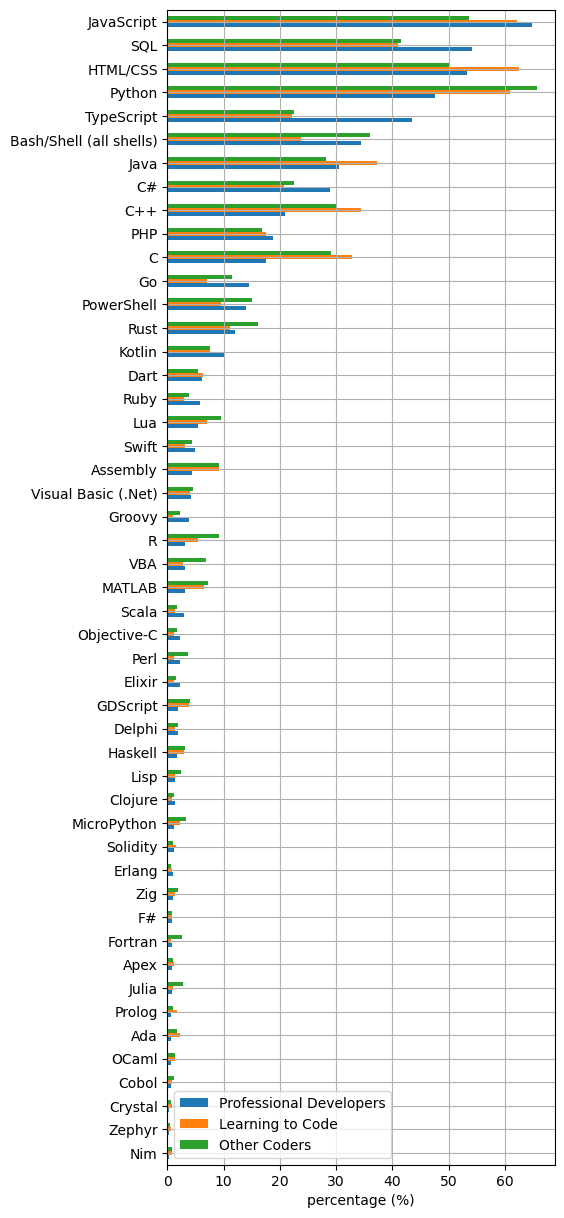

In [7]:
# plotting: programming language by popularity
(df_lang2 * 100).plot.barh(figsize=(5, 15))
plt.grid(True)
plt.xlabel('percentage (%)')
plt.show()

`Answer`: Javascript is the most popular  language for professional developers, followed
by SQL, HTML/CSS, Python, and Typescript. For those learning to code, the three
most popular languages are HTML/CSS, Javascript, and Python, respectively.`

### `2`. What is the most popular operating system for developers?

Note regarding missing values: similar to the previous question, respondents who
did not report their operating system are excluded from the analysis as the data
they provided is not relevant to answering the question of interest.

In [8]:
# find all operating systems asked in the survey

# df_os_per = df['OpSysPersonal use'].rename('OpSysPersonalUse').dropna(how='any')
# df_os_per = df_os_per.apply(lambda x:  x.split(sep=';'))
# op_sys_all = set()
# for val in df_os_per.values:
#     op_sys_all = op_sys_all.union(set(val))
# print(op_sys_all)

os_list = ['iPadOS', 'AIX', 'Other (please specify):', 'Red Hat', 'Arch',
              'Debian', 'Ubuntu', 'Solaris', 'Windows', 'iOS', 'Fedora',
              'Windows Subsystem for Linux (WSL)', 'BSD', 'Haiku', 'MacOS',
              'Other Linux-based', 'ChromeOS', 'Android', 'Cygwin']

In [9]:
# extract information regarding the operating system used by developers

def extract_opsys(raw_df: pd.DataFrame, col: str, os_list: list) -> pd.Series:
    ''' Process ETL to extract statistics of the operating systems used by
    professional developers in the survey.
    
    Parameters
    ----------
    - raw_df: the raw data from the survey
    - col: the column name of interest ('OpSysPersonal use' or 'OpSysProfessional use')
    - os_list: a list of all operating systems asked in the survey
    
    Returns
    -------
    A pd.Series specifying the proportion of developers with a specific operating system.
    
    '''
    df = raw_df[['ResponseId', col]].dropna()
    df[col] = df[col].apply(lambda x:  x.split(sep=';') if isinstance(x, str) else [])
    for val in os_list:
        df[val] = df[col].apply(lambda x: 1 if val in x else 0)
    df = df.rename(columns={'Other (please specify):': 'Others'})
    df = df.drop(columns=['ResponseId', col])

    return df.mean(numeric_only=True)


ser_os_per = extract_opsys(raw_df=df, col='OpSysPersonal use', os_list=os_list).rename('Personal Use')
ser_os_pro = extract_opsys(raw_df=df, col='OpSysProfessional use', os_list=os_list).rename('Professional Use')
df_os = pd.DataFrame([ser_os_per, ser_os_pro]).transpose().sort_values(by='Professional Use')
df_os.sort_values(by='Professional Use', ascending=False).head()

,Personal Use,Professional Use
Windows,0.596332,0.527023
MacOS,0.320298,0.351594
Ubuntu,0.278561,0.306515
Windows Subsystem for Linux (WSL),0.172620,0.186114
Debian,0.099134,0.100561


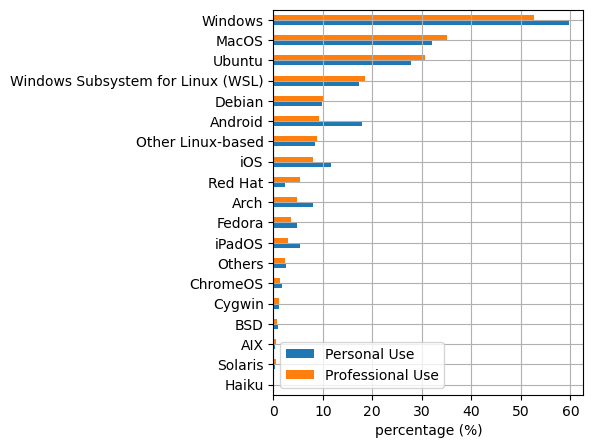

In [10]:
# plotting: operating systems by popularity
(df_os * 100).plot.barh(figsize=(4, 5))
plt.grid(True)
plt.xlabel('percentage (%)')
plt.show()

`Answer`: Windows is the most popular operating system for developers, across both personal and professional use, followed by MacOS and Ubuntu.

### `3`. What are the top paying technologies?

Note regarding missing values: Respondents who did not report their annual total
compenstation or their technical stack (programming language) are excluded from
the analysis as their provided answers are irrelevant to answering the question
of interest.  

In [11]:
# extract information regarding the annual total compensation of professional developers
df_paying = df[['MainBranch', 'LanguageHaveWorkedWith', 'CompTotal']]
df_paying = df_paying[df_paying['MainBranch'] == 'I am a developer by profession']
df_paying = df_paying.dropna(how='any')
df_paying['LanguageHaveWorkedWith'] = df_paying['LanguageHaveWorkedWith'].apply(lambda x: x.split(sep=';'))
print('# of rows:', df_paying.shape[0])
df_paying.head()

# of rows: 30738


,MainBranch,LanguageHaveWorkedWith,CompTotal
72,I am a developer by profession,"[Assembly, Bash/Shell (all shells), C, C++, HT...",2040000.0
379,I am a developer by profession,"[JavaScript, Julia, Python, SQL, TypeScript]",85000.0
385,I am a developer by profession,[Python],50000.0
389,I am a developer by profession,"[HTML/CSS, JavaScript, Python, SQL, TypeScript]",110000.0
392,I am a developer by profession,"[C#, HTML/CSS, Java, JavaScript, MicroPython, ...",126420.0


In [12]:
# extract the median for the annual total compensation for each language
paying = dict()
for lang in languages:
    filter_ = df_paying['LanguageHaveWorkedWith'].apply(lambda x: lang in x)
    paying[lang] = df_paying[filter_]['CompTotal'].median()

paying_by_lang = pd.Series(paying).sort_values()
paying_by_lang.sort_values(ascending=False).head(10)

Scala          140416.0
Clojure        140000.0
F#             140000.0
Objective-C    140000.0
Erlang         138750.0
OCaml          133300.0
Ruby           132000.0
Elixir         129000.0
Go             128481.5
Lisp           125000.0
dtype: float64

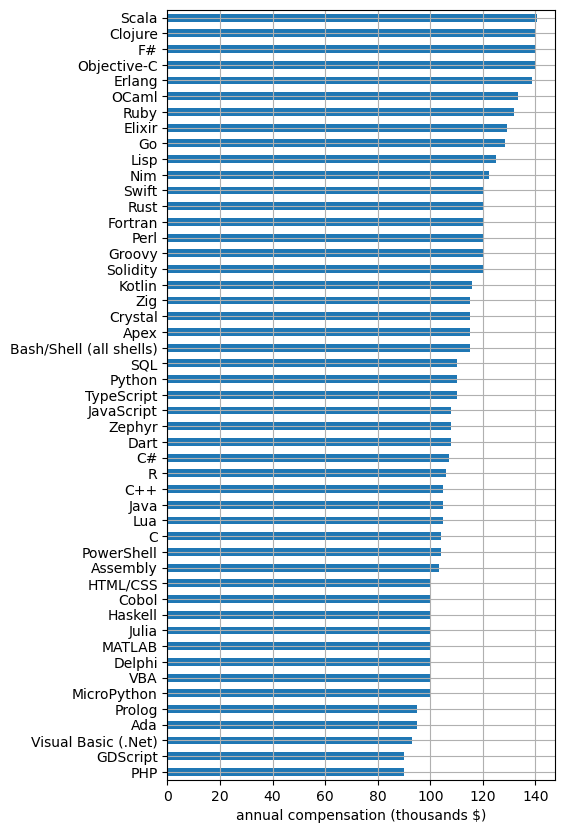

In [13]:
# plotting: median anuual total compensation by programming languages
(paying_by_lang / 1000).plot.barh(figsize=(5, 10))
plt.grid(True)
plt.xlabel('annual compensation (thousands $)')
plt.show()

`Answer`: The highest reported median salary is for professional developers with the following programming languages: Scala, Objective-C, F#, Clojure, and Erlang. Among those, PHP, GDScript, Visual Basic (.Net), Ada, and Prolog are reported to have the lowest median salary. 